# 다중 출력 회귀

- 타겟변수 y가 하나의 값을 갖는 것이 아니라 다수의 값을 갖는 경우
- 회귀와 분류
 - (회귀)출력이 벡터 형태로 다수의 아나로그 값을 갖는 경우
 - (분류)출력이 남여 구분이 아니라 국적 구분도 해야 하는 경우(multi-class output)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
from numpy.random import rand, randn

## 데이터 생성
- 시스템의 입력과 출력 데이터 생성 함수

In [60]:
def get_random_x(n_steps=30):
    a = 0.5 + rand() # 0.5 ~ 1.5 사이의 임의의 레벨 선택
    xs = np.linspace(0,6,n_steps)
    ys = -0.1*a*xs*(xs -6) # y = -a*x(x-6) 거리가 6 나가는 포물선
    return ys

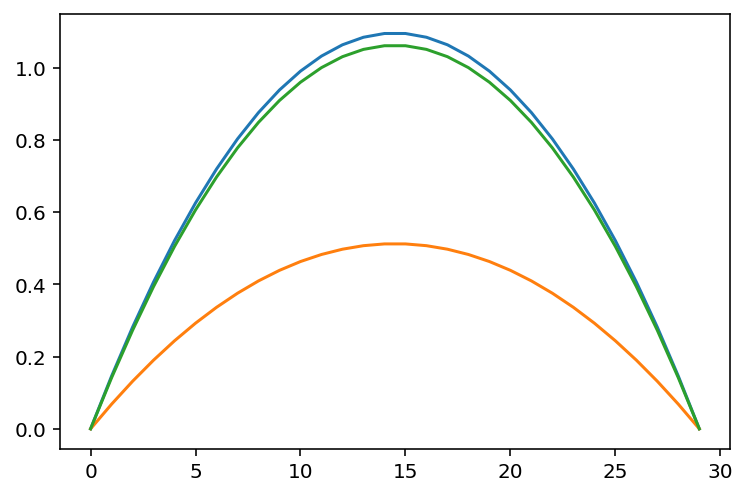

In [61]:
# 랜덤한 입력 신호 생성
plt.plot(get_random_x())
plt.plot(get_random_x())
plt.plot(get_random_x())

In [62]:
get_random_x()

array([ 0.        ,  0.09097124,  0.17544454,  0.25341989,  0.32489729,
        0.38987675,  0.44835827,  0.50034183,  0.54582746,  0.58481513,
        0.61730486,  0.64329664,  0.66279048,  0.67578637,  0.68228432,
        0.68228432,  0.67578637,  0.66279048,  0.64329664,  0.61730486,
        0.58481513,  0.54582746,  0.50034183,  0.44835827,  0.38987675,
        0.32489729,  0.25341989,  0.17544454,  0.09097124, -0.        ])

In [99]:
# 임의의 출력을 얻는 함수 (4개를 얻는다고 가정) 
def get_4_y(x):
    y1 = x.sum() + 1.8*randn()
    y2 = (x**2).sum() + 1.8*randn()
    y3 = (x**3).sum() + 1.8*randn()
    y4 = (x**4).sum() + 1.8*randn()
    return y1, y2, y3, y4

In [100]:
sample = get_random_x()
print('X=', sample)
print('y=',get_4_y(sample))

X= [ 0.          0.17206097  0.33183186  0.47931269  0.61450345  0.73740414
  0.84801476  0.94633531  1.03236579  1.10610621  1.16755655  1.21671683
  1.25358704  1.27816717  1.29045724  1.29045724  1.27816717  1.25358704
  1.21671683  1.16755655  1.10610621  1.03236579  0.94633531  0.84801476
  0.73740414  0.61450345  0.47931269  0.33183186  0.17206097 -0.        ]
y= (25.26631887984755, 27.288181478544132, 29.07520329302247, 34.193846565715525)


In [101]:
# 샘플 데이터 X, y 생성
N = 200
samples = []
multi_y = []
for i in range(N):
    x = get_random_x()
    samples.append(x)
    multi_y.append(get_4_y(x))
X = np.array(samples)
y = np.array(multi_y)

In [102]:
X.shape, y.shape

((200, 30), (200, 4))

In [103]:
X[:3], y[:3]

(array([[ 0.        ,  0.14281405,  0.2754271 ,  0.39783914,  0.51005019,
          0.61206022,  0.70386926,  0.78547729,  0.85688431,  0.91809033,
          0.96909535,  1.00989937,  1.04050238,  1.06090439,  1.07110539,
          1.07110539,  1.06090439,  1.04050238,  1.00989937,  0.96909535,
          0.91809033,  0.85688431,  0.78547729,  0.70386926,  0.61206022,
          0.51005019,  0.39783914,  0.2754271 ,  0.14281405, -0.        ],
        [ 0.        ,  0.11416567,  0.22017666,  0.31803295,  0.40773455,
          0.48928146,  0.56267368,  0.62791121,  0.68499405,  0.73392219,
          0.77469565,  0.80731441,  0.83177849,  0.84808787,  0.85624256,
          0.85624256,  0.84808787,  0.83177849,  0.80731441,  0.77469565,
          0.73392219,  0.68499405,  0.62791121,  0.56267368,  0.48928146,
          0.40773455,  0.31803295,  0.22017666,  0.11416567, -0.        ],
        [ 0.        ,  0.07105208,  0.13702902,  0.1979308 ,  0.25375744,
          0.30450893,  0.35018527,  

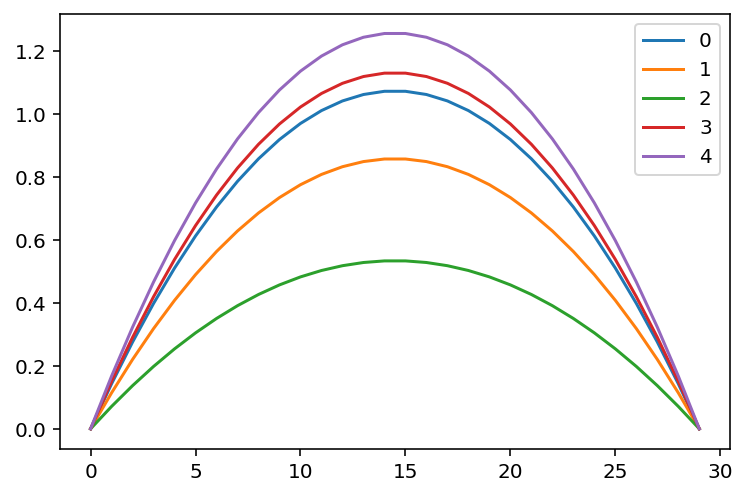

In [104]:
for i in range(5):
    plt.plot(X[i], label=str(i))
    plt.legend()

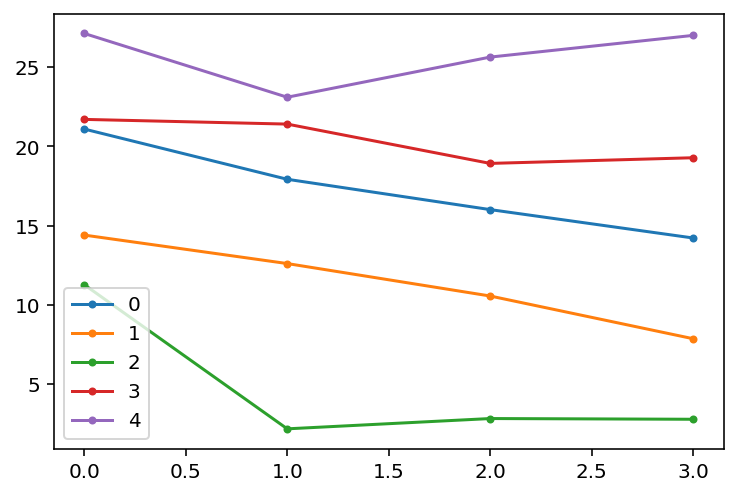

In [105]:
for i in range(5):
    plt.plot(y[i], label=str(i), marker='.')
    plt.legend()

### 모든 입력 데이터를 사용한 다중회귀 예측

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)

In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20)

## 컬럼별로 r2 구하기
- 목적 변수에 4개의 컬럼(y1, y2, y3, y4) 이 있다
- 각 컬럼별로 r2 구하기

In [108]:
y_pred = rfr.predict(X_test)
r2_score(y_test, y_pred, multioutput="raw_values")

array([0.81179473, 0.91040412, 0.95140719, 0.95863745])

In [109]:
# 과제: 노이지가 많아서 y를 생성할 때 노이지 레벨을 0.1, 0.2, 0.3 로 바꾸어본다.
# 실제값과 예측치를 비교해서 그려보시오(plot) (y_test, y_pred 비교): 4세트가 있다!

In [110]:
y_pred.shape

(50, 4)

In [111]:
y_test.shape

(50, 4)

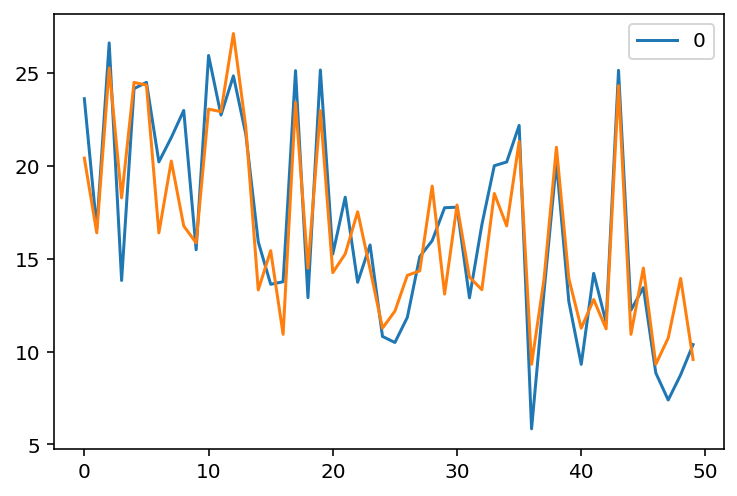

In [112]:
for i in range(1):
    plt.plot(y_test[:,i], label=str(i))
    plt.plot(y_pred[:,i])
plt.legend()

In [113]:
r2_score(y_test, y_pred, multioutput="raw_values")

array([0.81179473, 0.91040412, 0.95140719, 0.95863745])

In [114]:
# 컬럼별 r2의 평균을 보여준다
r2_score(y_test, y_pred)

0.9080608738705497

# 다중 분류
- multi-class output 모델
- y로 단일 값이 아니라 아래와 같이 다중 값을 사용
 - multi_y = np.c_[y1, y2] 또는
 - multi_y = np.stack((y1,y2)).T 사용